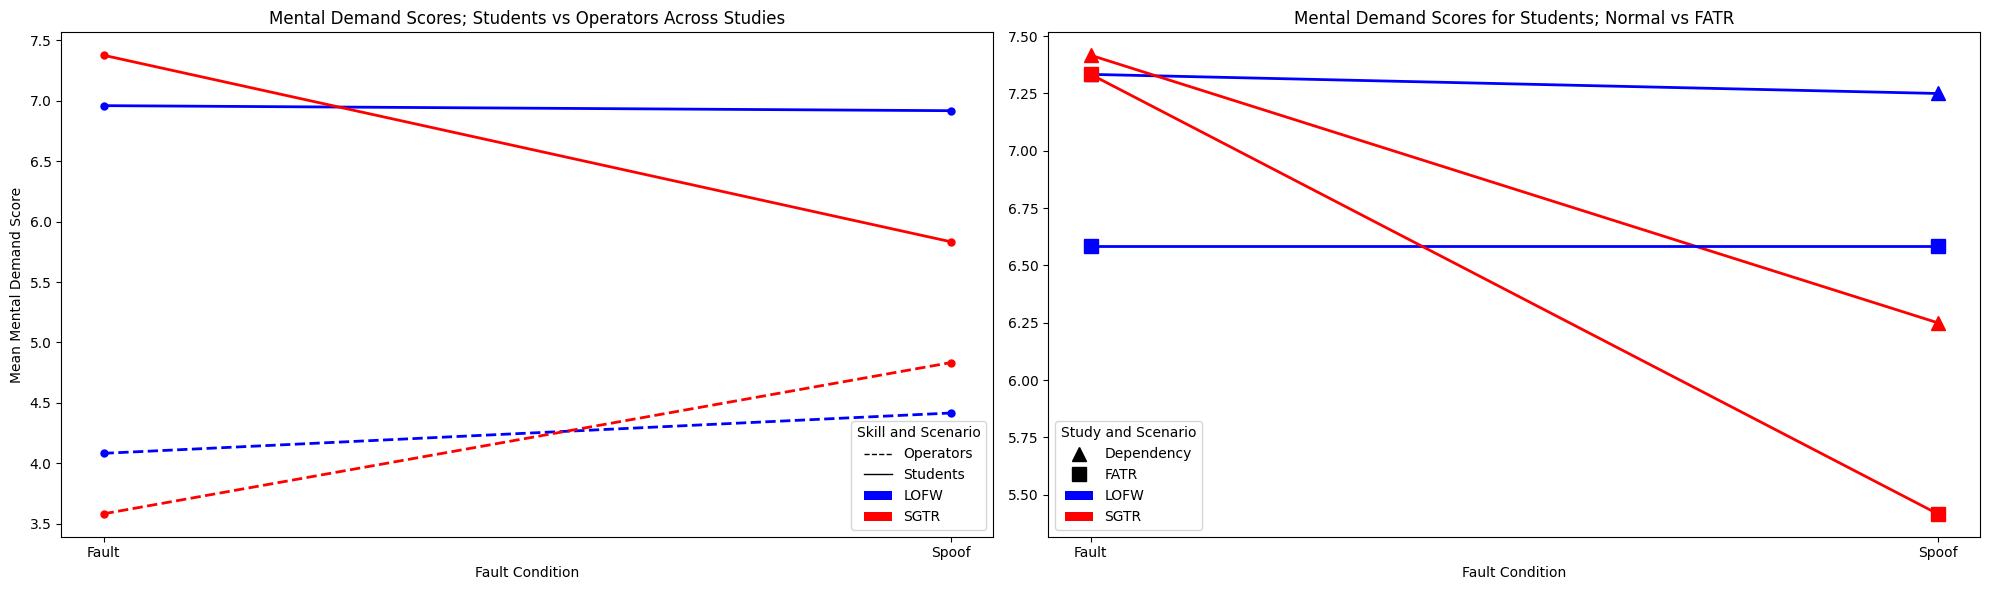

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

def load_data(data_path):
    new_data = pd.read_csv(data_path)
    return new_data

def prepare_data(new_data):
    # No need to convert to numeric if we're using categorical plots directly
    mean_scores = new_data.groupby(['Skill', 'Scenario', 'Fault Condition'])['Mental Demand'].mean().reset_index()
    operators = mean_scores[mean_scores['Skill'] == 'Operator']
    students = mean_scores[mean_scores['Skill'] == 'Student']
    mean_scores_students = new_data[new_data['Skill'] == 'Student'].groupby(['Study', 'Scenario', 'Fault Condition'])['Mental Demand'].mean().reset_index()
    return operators, students, mean_scores_students

def plot_interaction_scores(operators, students):
    fig, ax = plt.subplots(figsize=(10, 6))
    # Operators - Dashed lines
    # Students - Solid lines
    # [Include the plotting logic here for the left plot, using 'ax' instead of 'axs[0]']
    return ax

def plot_mental_demand_scores(mean_scores_students):
    fig, ax = plt.subplots(figsize=(10, 6))
    # [Include the plotting logic here for the right plot, using 'ax' instead of 'axs[1]']
    return ax
